<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/MLP_MNIST_Keras_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JUPYTER NOTEBOOK FOR A MLP LEARNING MNIST NUMBERS from 0 to 9 **

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

**Define the network hyperparameters**

In [0]:
# Trainign batch size 
batch_size = 128
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1


**Load the MNIST dataset and format it for train and validation**

In [0]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)


**Define the MLP achitecture using KERAS sequential API**

In [17]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=50, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=25, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="sigmoid", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                260       
Total params: 85,085
Trainable params: 85,085
Non-trainable params: 0
_________________________________________________________________


**Train the MLP**

In [18]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 36us/step - loss: 0.1591 - acc: 0.1080 - val_loss: 0.0916 - val_acc: 0.1085
Epoch 2/50
42000/42000 [==============================] - 1s 32us/step - loss: 0.0915 - acc: 0.1143 - val_loss: 0.0913 - val_acc: 0.1079
Epoch 3/50
42000/42000 [==============================] - 1s 33us/step - loss: 0.0913 - acc: 0.1143 - val_loss: 0.0912 - val_acc: 0.1079
Epoch 4/50
42000/42000 [==============================] - 1s 32us/step - loss: 0.0912 - acc: 0.1143 - val_loss: 0.0911 - val_acc: 0.1079
Epoch 5/50
42000/42000 [==============================] - 1s 32us/step - loss: 0.0911 - acc: 0.1143 - val_loss: 0.0910 - val_acc: 0.1079
Epoch 6/50
42000/42000 [==============================] - 1s 34us/step - loss: 0.0910 - acc: 0.1143 - val_loss: 0.0909 - val_acc: 0.1079
Epoch 7/50
42000/42000 [==============================] - 1s 31us/step - loss: 0.0910 - acc: 0.1143 - val_loss: 0.0908 - val_acc

**Evaluate the MLP performance**

In [19]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 25us/step
Summary: Loss over the test dataset: 0.03, Accuracy: 0.84


**Plot the training and validation performances**

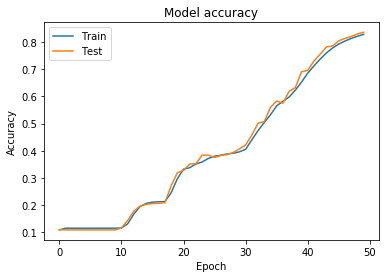

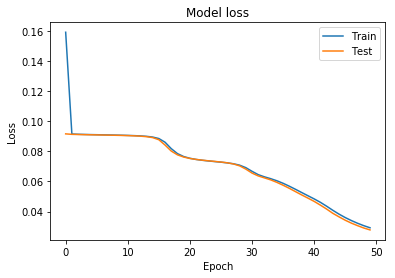

In [20]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

(10000, 10)


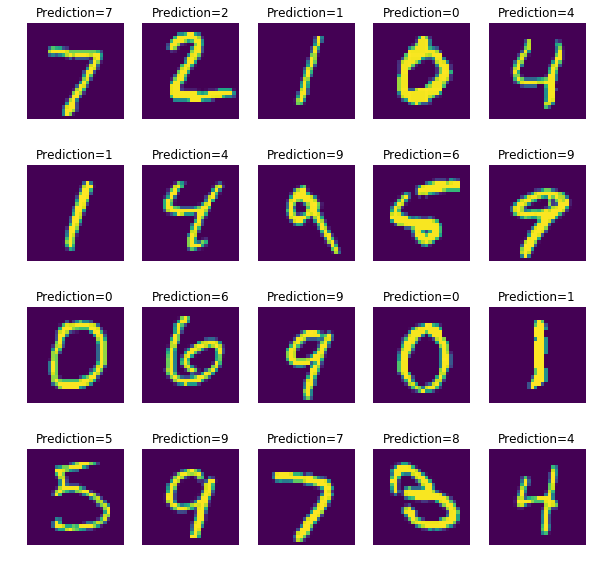

In [21]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test) 
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()

**Exercises:**

---


**Question 1**: What happens if you increase/decrease the number of hidden layers?


**Question 2:** What happens if you increase/decrease the number of nodes per hidden layer?

**Question 3:** What happens if you increase/decrease the learning rate ?

**Question 4:** What happens if you increase/decrease the number of training epochs  ?

**Question 5:** What happens if you increase/decrease the training batch size ?

**Question 6:** What happens if you use the ReLU activation function in the hidden layers ?